# GTSRB

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "pics" / "gtsrb"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Etykiety klas

In [3]:
classes = {
    0: 'Ograniczenie prędkości (20 km/h)',
    1: 'Ograniczenie prędkości (30 km/h)',
    2: 'Ograniczenie prędkości (50 km/h)',
    3: 'Ograniczenie prędkości (60 km/h)',
    4: 'Ograniczenie prędkości (70 km/h)',
    5: 'Ograniczenie prędkości (80 km/h)',
    6: 'Koniec ograniczenia prędkości (80 km/h)',
    7: 'Ograniczenie prędkości (100 km/h)',
    8: 'Ograniczenie prędkości (120 km/h)',
    9: 'Zakaz wyprzedzania',
    10: 'Zakaz wyprzedzania przez samochody ciężarowe',
    11: 'Skrzyżowanie z drogą podporządkowaną występującą po obu stronach',
    12: 'Droga z pierwszeństwem',
    13: 'Ustąp pierwszeństwa',
    14: 'Bezwzględny nakaz zatrzymania się (stop)',
    15: 'Zakaż ruchu w obu kierunkach',
    16: 'Zakaz wjazdu pojazdów ciężarowych',
    17: 'Zakaz wjazdu',
    18: 'Inne niebezpieczeństwa',
    19: 'Niebezpieczny zakręt w lewo',
    20: 'Niebezpieczny zakręt w prawo',
    21: 'Dwa niebezpieczne zakręty, pierwszy w lewo',
    22: 'Nierówna droga',
    23: 'Śliska jezdnia',
    24: 'Zwężenie jezdni prawostronne',
    25: 'Roboty na drodze',
    26: 'Sygnały świetlne',
    27: 'Piesi',
    28: 'Dzieci',
    29: 'Rowerzyści',
    30: 'Oszronienie jezdni',
    31: 'Zwierzęta dzikie',
    32: 'Koniec zakazów',
    33: 'Nakaz skrętu w prawo za znakiem',
    34: 'Nakaz skrętu w lewo za znakiem',
    35: 'Nakaz jazdy na wprost',
    36: 'Nakaz jazdy prosto lub skrętu w prawo',
    37: 'Nakaz jazdy prosto lub skrętu w lewo',
    38: 'Nakaz jazdy z prawej strony znaku',
    39: 'Nakaż jazdy z lewej strony znaku',
    40: 'Ruch okrężny',
    41: 'Koniec zakazu wyprzedzania',
    42: 'Koniec zakazu wyprzedzania przez samochody ciężarowe',
}

TRAIN_PATH = Path() / "GTSRB" / "Final_Training" / "Images"

### Przykładowe próbki

NameError: name 'TRAIN_PATH' is not defined

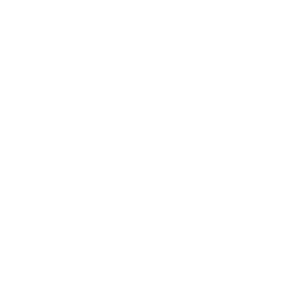

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for i in range(43):
    plt.subplot(7, 7, i+1)
    
    plt.axis('off')
    plt.tight_layout()

    img = plt.imread(TRAIN_PATH / f"{i}" / "00000_00012.png")

    plt.imshow(img)

save_fig("gtsrb_examples")
plt.show()

### Liczebność próbek poszczególnych klas

##### Zbiór uczący

In [ ]:
train_count = {}
img_ext = "png"

for sub in TRAIN_PATH.iterdir():
    if sub.is_dir():
        train_count[int(sub.name)] = len(list(sub.glob(f"*.{img_ext}")))
        
plt_info = {classes[k]: v for k, v in train_count.items()}
plt_info = dict(sorted(plt_info.items(), key=lambda item: item[1], reverse=False))


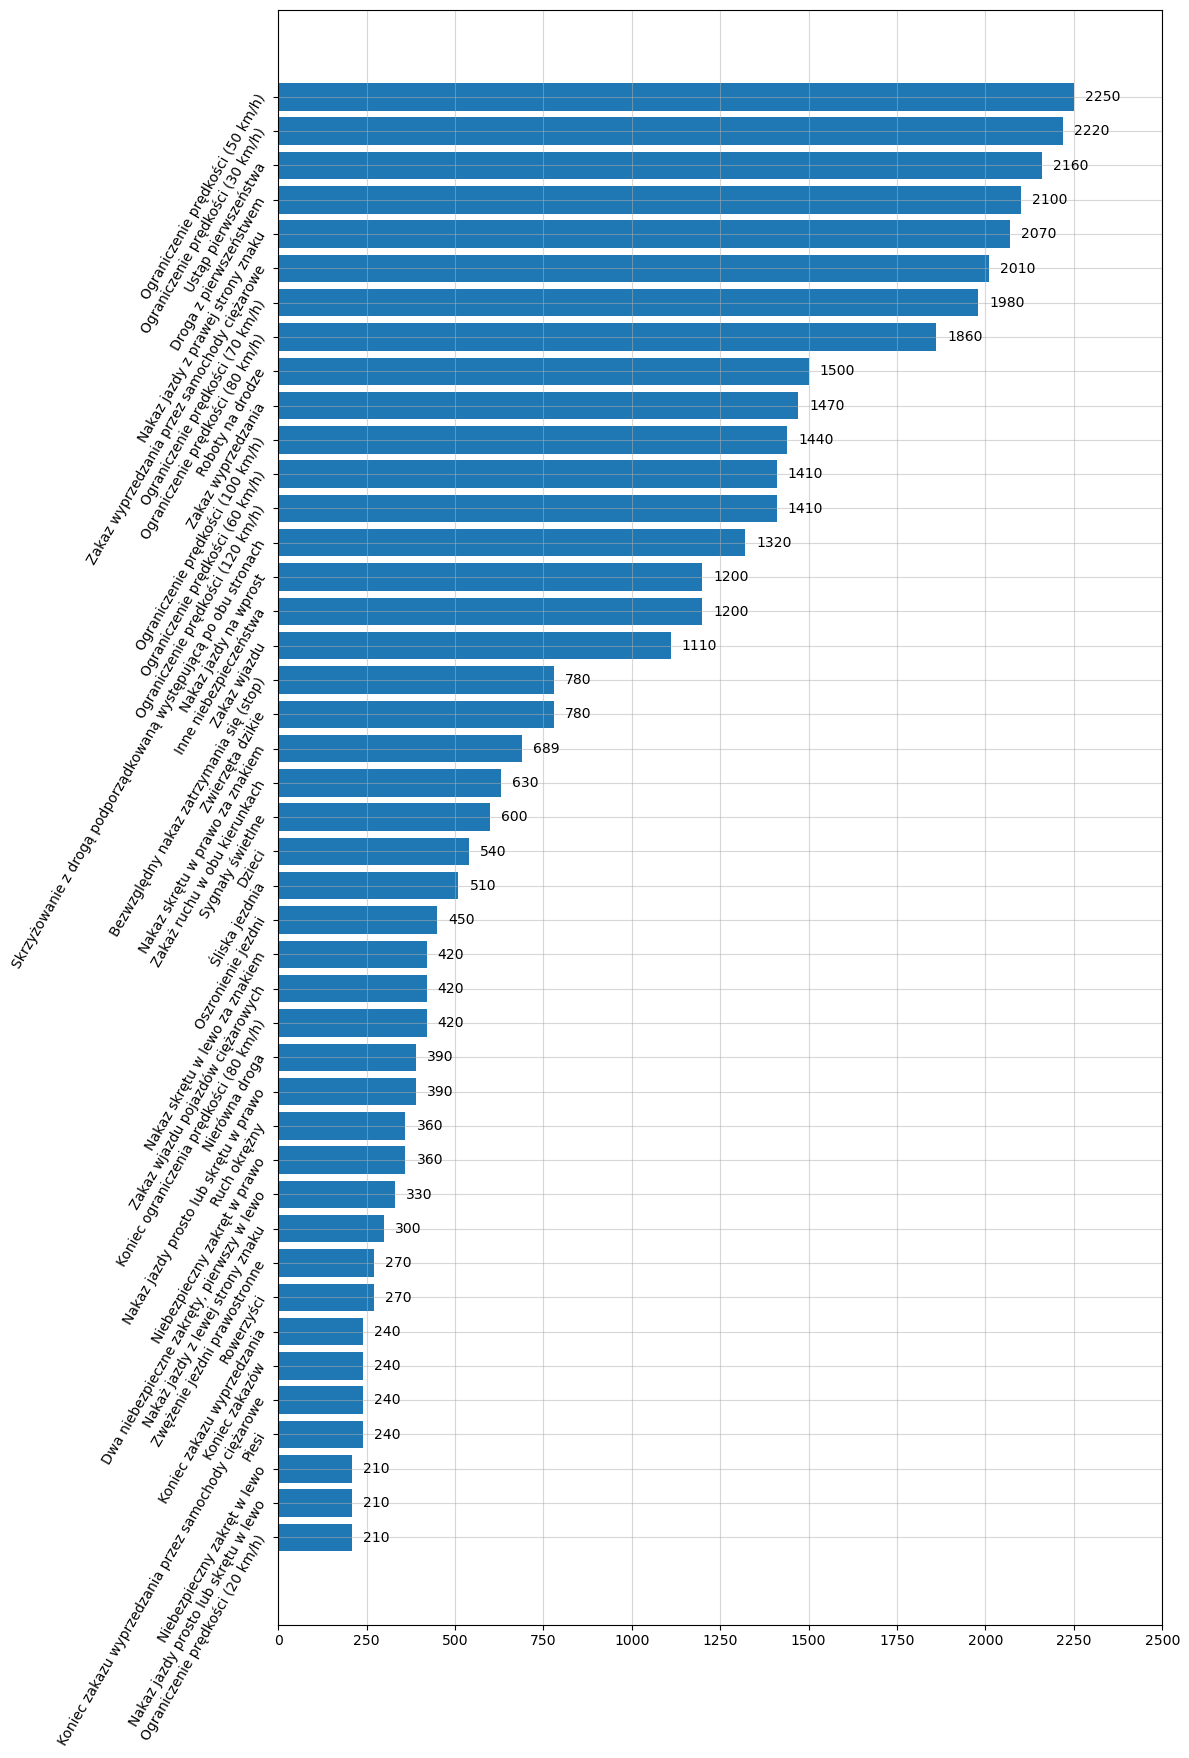

In [ ]:
plt.figure(figsize=(12, 18))

bc = plt.barh(plt_info.keys(), plt_info.values())
plt.bar_label(bc, plt_info.values(), padding=8);

plt.xticks(range(0, 2501, 250))
plt.yticks(rotation=60)
plt.grid(alpha=0.5, zorder=-1)

save_fig("gtsrb_classes_hist")
plt.show()

##### Zbiór testowy

In [5]:
import csv
from pathlib import Path

test_count = {}

TEST_DESCIPTOR = Path() / "GTSRB" / "Final_Test" / "Images" / "GT-final_test.csv"

with open(TEST_DESCIPTOR, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    next(reader)
    
    for row in reader:
        label = int(row[7])
        
        if label in test_count:
            test_count[label] += 1
        else:
            test_count[label] = 1
        
plt_info = {classes[k]: v for k, v in test_count.items()}
plt_info = dict(sorted(plt_info.items(), key=lambda item: item[1], reverse=False))


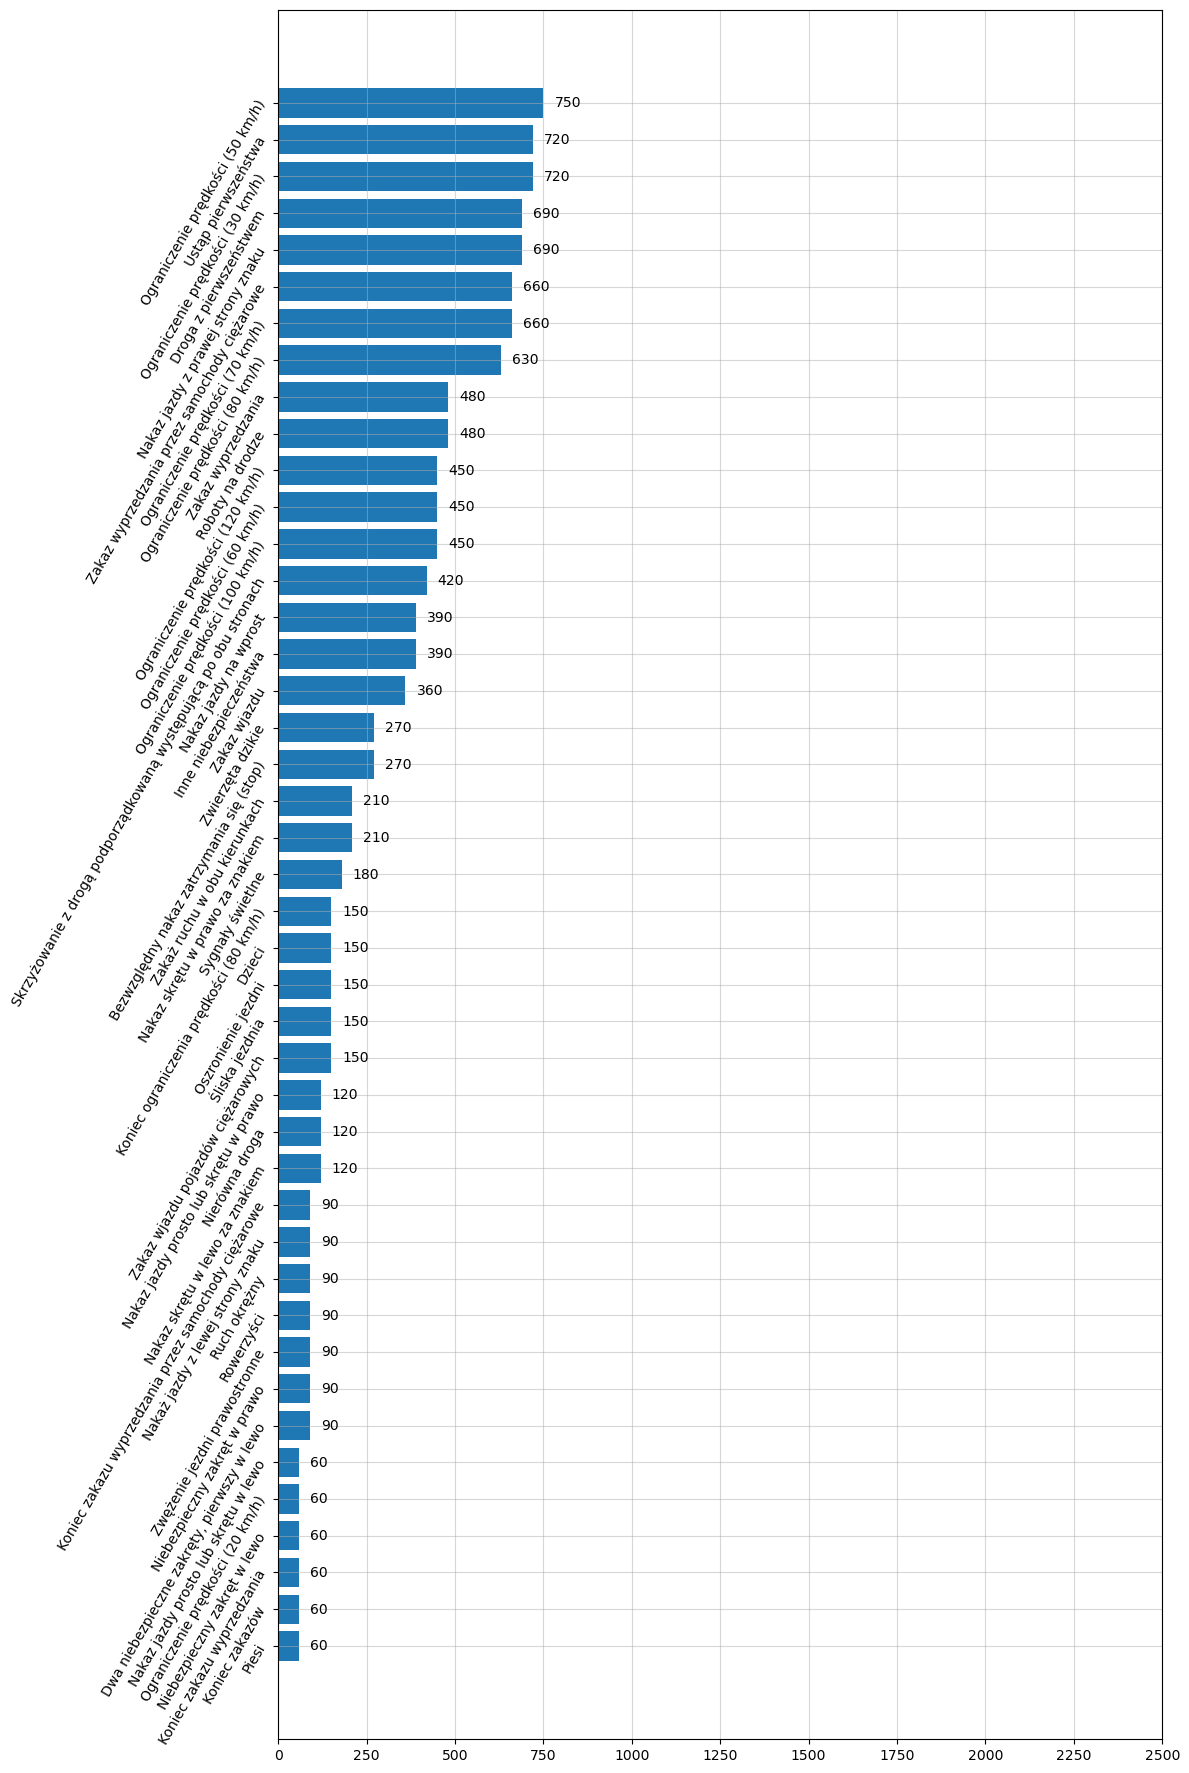

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 18))

bc = plt.barh(plt_info.keys(), plt_info.values())
plt.bar_label(bc, plt_info.values(), padding=8);

plt.xticks(range(0, 2501, 250))
plt.yticks(rotation=60)
plt.grid(alpha=0.5, zorder=-1)

save_fig("gtsrb_test_classes_hist")
plt.show()

### Rozdzielczości próbek
###### szerokość

In [27]:
import os
from PIL import Image

widths = [30, 50, 100, 120, 150, 170, 190, 210, 250]
widths_labels = [f"<= {w}" for w in widths]

def plot_buckets(path):
    buckets = [0] * len(widths)

    for (root, _, files) in os.walk(path, topdown=True):
        for file in files:
            if not file.endswith(".png"):
                continue
            
            img = Image.open(f"{root}/{file}")

            for i, width in enumerate(widths):
                if img.width <= width:
                    buckets[i] += 1
                    break

    return buckets

##### Zestaw uczący

In [6]:
train_buckets = plot_buckets(TRAIN_PATH)

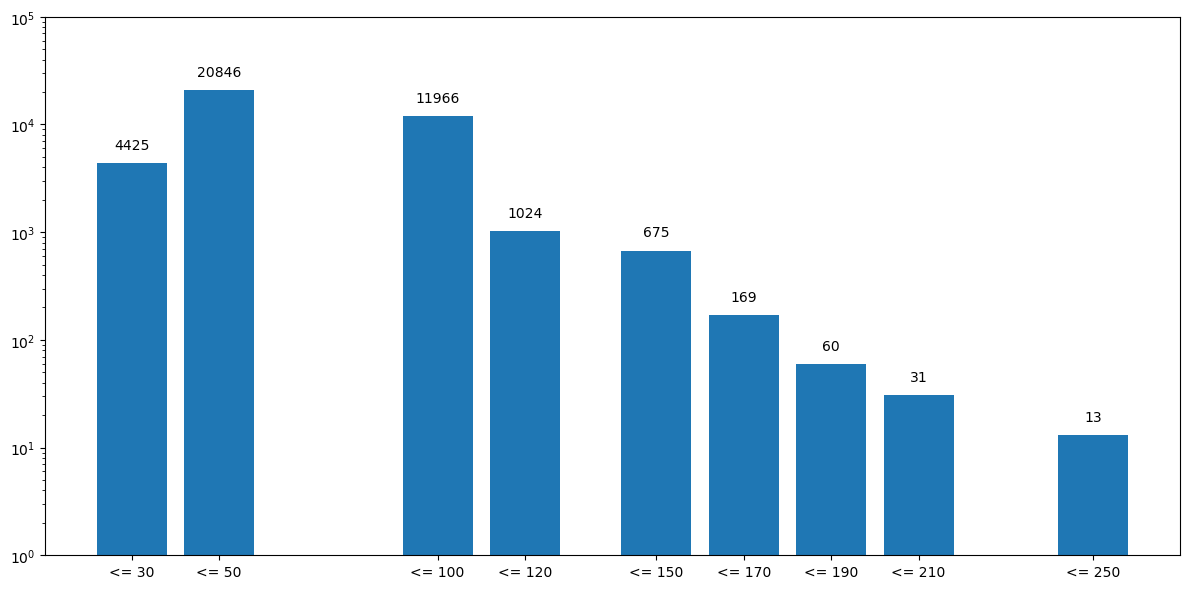

In [39]:
plt.figure(figsize=(12, 6))

b = plt.bar(widths, train_buckets, width=16)
plt.bar_label(b, train_buckets, padding=8)
plt.yscale('log')
plt.xticks(widths, widths_labels)
plt.ylim(1, 1e5)

save_fig("train_width_buckets")
plt.show()

##### Zestaw testowy

In [40]:
TEST_PATH = Path() / "GTSRB" / "Final_Test" / "Images"

test_buckets = plot_buckets(TEST_PATH)

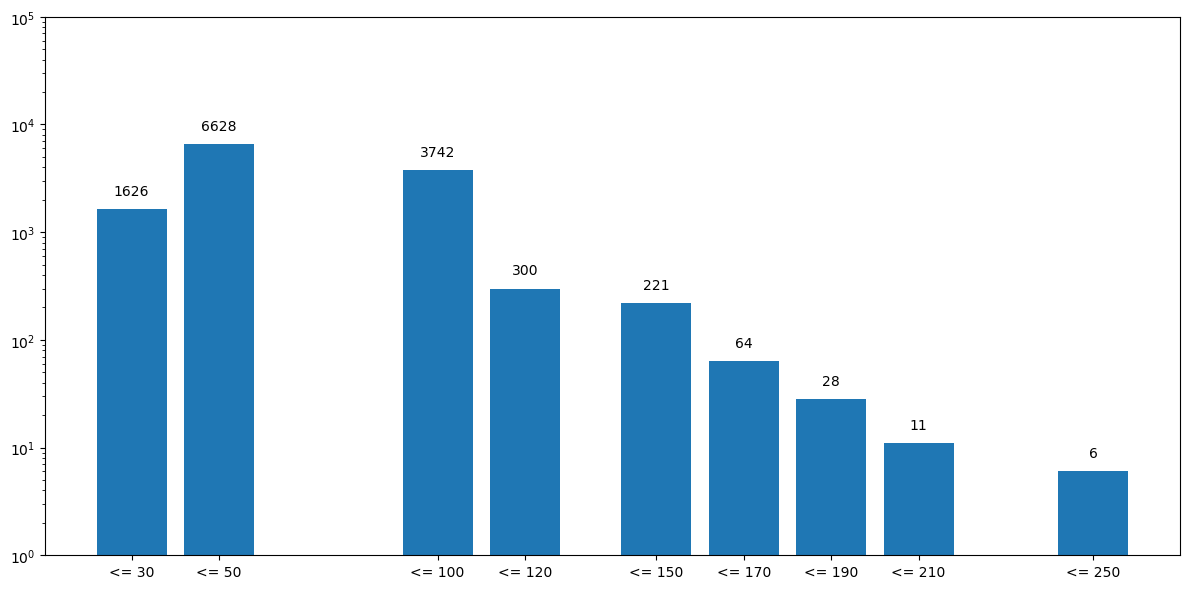

In [41]:
plt.figure(figsize=(12, 6))

b = plt.bar(widths, test_buckets, width=16)
plt.bar_label(b, test_buckets, padding=8)
plt.yscale('log')
plt.xticks(widths, widths_labels)
plt.ylim(1, 1e5)

save_fig("test_width_buckets")
plt.show()